#Movimiento de una partícula cargada en un campo magnético tipo bobina de Helmholtz 

## Modelaje del campo magnético y la dinámica de la partícula

In [1]:
#Librerias
from numpy import *
from scipy import *
from scipy.special import *
from scipy.integrate import *
from pylab import *
from JSAnimation import IPython_display
from matplotlib import animation
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Las bobinas de Helmholtz consiste en un arreglo de espiras, una encima de la otra como se muestra a continuación, en donde se hace pasar corriente continua en el mismo sentido a las dos espiras.

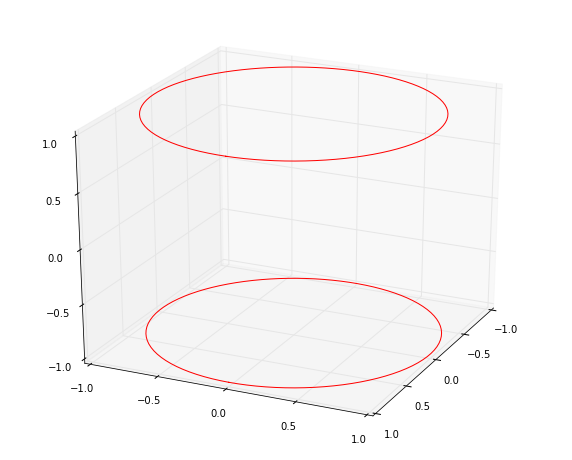

In [2]:
fig = figure(figsize=(10,8))
ax = fig.gca(projection='3d')
angle = np.linspace(0, 2 * pi, 100)
a, h = 1., 1.
X1, Y1, Z1 = a*cos(angle), a*sin(angle), h
X2, Y2, Z2 = a*cos(angle), a*sin(angle), -h
plot(X1, Y1, Z1, 'r')
plot(X2, Y2, Z2, 'r')
ax.view_init(25, 25)
show()

Para determinar el campo magnético de este arreglo de espiras primero debemos de mostrar el campo magnético que genera una espira en todo el espacio.

Usando la ley de Biot-Savart sabemos lo siguiente:

$$\vec{B}(\vec{r}) = \frac{\mu_{0}}{4\pi} \int_{V} \frac{\vec{j}\times(\vec{r}'-\vec{r})}{|\vec{r}'-\vec{r}|^{3}} dV$$

En nuestro caso considerando que es una espira 1-dimencional tenemos:

$$\vec{B}(\vec{r}) = \frac{\mu_{0}}{4\pi} \int_{\gamma} \frac{I(\vec{r}')d\vec{\ell}\times(\vec{r}'-\vec{r})}{|\vec{r}'-\vec{r}|^{3}}$$

Donde $\gamma$ es la curva que describe a la espira y $d\vec{\ell}$ su parametrización.

En este caso podemos describir a $\gamma$ en coordenadas cilindricas de la siguiente manera:
$$\gamma = \{(r, \theta, z) = ( a, \theta, 0), \theta \in[0,2\pi] \}$$
Donde $a$ es el radio de la espira.

Por lo tanto 
$$d\vec{\ell} = a \hat{\theta} d\theta$$

Tomando esto en consideración calculamos el campo magnético en todo punto del espacio (r, $\theta$, z) y obtenemos:

Si $r \neq 0$
$$B_{z} = \frac{\mu_{0} I}{4\pi} \frac{2}{\sqrt{(a+r)^{2}+(z-h)^{2}}} \left\lbrack K(k^{2}) + \frac{a^{2}-r^{2}-(z-h)^{2}}{(a-r)^{2}+(z-h)^{2}}E(k^{2}) \right\rbrack $$
$$B_{r} = \frac{\mu_{0} I}{4\pi}\frac{z-h}{r} \frac{2}{\sqrt{(a+r)^{2}+(z-h)^{2}}} \left\lbrack -K(k^{2}) + \frac{a^{2}+r^{2}+(z-h)^{2}}{(a-r)^{2}+(z-h)^{2}} E(k^{2}) \right\rbrack$$

$$B_{\theta} = 0$$
Si $r = 0$
$$B_{z} = \frac{\mu_{0}}{4\pi} \frac{2\pi a^{2} I}{\left((z-h)^{2}+a^{2}\right)^{3/2}}$$
$$B_{r} = 0$$
$$B_{\theta} = 0$$


Donde $K(k)$ y $E(k)$ son las integrales elípticas completas de primera y segunda especie respectivamente y $k^{2} = \frac{4ar}{(r+a)^{2}+(z-h)^{2}}$.

Poniendo todo en unidades de $\frac{\mu_0}{4\pi}$

In [52]:
#Se define la forma que va a tener el campo magnetico
#Las variables que hay que considerar son las siguientes
# I->      la corriente
# a->      el radio de la espira
# h->      la altura a la que se encuentra la espira
# r_vec->  el punto en el espacio en el cual queremos calcular el campo magnético

def campo_mag(I, a, h, r_vec, f=0):
    # r_vec va a estar dado en coordenadas cilindricas (r, z, phi)
    r = r_vec[0]
    z = r_vec[1]

    #f va a servir de bandera ya que el campo magnetico depende del valor de r
    if f==0:
    # si r <> 0 entonces 
        k2 = (4*a*r)/((r+a)**2+(z-h)**2)
        B_z = I*(2/sqrt((a+r)**2+(z-h)**2))*(ellipk(k2) + ellipe(k2)*((a**2-r**2-(z-h)**2)/((a-r)**2+(z-h)**2)))
        B_r = I*((z-h)/r)*(2/sqrt((a+r)**2+(z-h)**2))*(-ellipk(k2) + ellipe(k2)*((a**2+r**2+(z-h)**2)/((a-r)**2+(z-h)**2)))

    elif f==1:
    # si r = 0 entonces 
        B_r = 0.
        B_z = (2*pi*I*a**2)/sqrt((a**2+(z-h)**2)**3)

    return B_r, B_z

#Se define una funcion paa obtener el campo magnetico unitario
def campo_unit(I, a, r_vec, h=0, f=0):
    B_r, B_z = campo_mag(I, a, r_vec, h, f)
    B = sqrt(B_r**2+B_z**2)
    b_r, b_z = B_r/B, B_z/B
    return b_r, b_z, B

A continuación se grafica la dirección del campo magnétio generado por una espira de radio a = 1 sobre el plano $XY$, El campo magnético al no depender el ángulo $\theta$ se realiza entonces en coordenadas cilindricas para $\theta$ arbitrario.

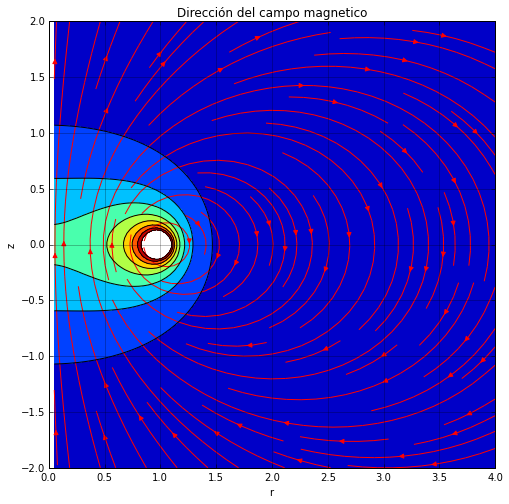

In [55]:
N_malla = 100
n, m = 4, 2
R_min, R_max, Z_min, Z_max = 0.05, n, -m, m

r, z = linspace(R_min, R_max, N_malla), linspace(Z_min, Z_max, N_malla)
R, Z = meshgrid(r,z)

I, a, h = 1., 1., 0.
b_r, b_z, B = campo_unit(I, a, h, [R, Z])

figure(figsize=(8,8),dpi=80)
contour_levels = arange(0., 18, 2.)
cs = contourf(R, Z, B, contour_levels , corner_mask=True)
contour(cs, colors='k')
grid(c='k', ls='-', alpha=0.5)
streamplot(R, Z, b_r, b_z, color='r')

gca().set_aspect('equal', adjustable='box')

xlabel('r') 
ylabel('z')
axis([0., R_max, Z_min, Z_max])
title(u'Dirección del campo magnetico')
show()

In [57]:
#Se define una funcion que va a calcular el campo magnetico de un arreglo de espiras
#La forma en que lo hace es haciendole pasar un arreglo de radios y alturas, a=[...], h=[...]
#y suma para cada caso, nota a, h e I deben de tener la misma dimension
def campo(I, a, h, r_vec, f=0):
    B_r, B_z = 0., 0.
    for i in range(len(h)):
        B_i = campo_mag(I[i], a[i], h[i], r_vec, f)
        B_r = B_r + B_i[0]
        B_z = B_z + B_i[1]
    return B_r, B_z

#Se calcula campo unitario para el caso de multiples espriras
def campo_unit2(I, a, h, r_vec, f=0):
    B_R, B_Z = campo(I, a, h, r_vec, f)
    B = sqrt(B_R**2+B_Z**2)
    b_r, b_z = B_R/B, B_Z/B
    return b_r, b_z, B

A continuación se grafica la dirección del campo magnétio generado por dos espiras de radio a = 1 a una altura h=1 y h=-1. Analogo al caso de una espira, el campo magnético al no depender el ángulo $\theta$ se realiza entonces en coordenadas cilindricas para $\theta$ arbitrario.

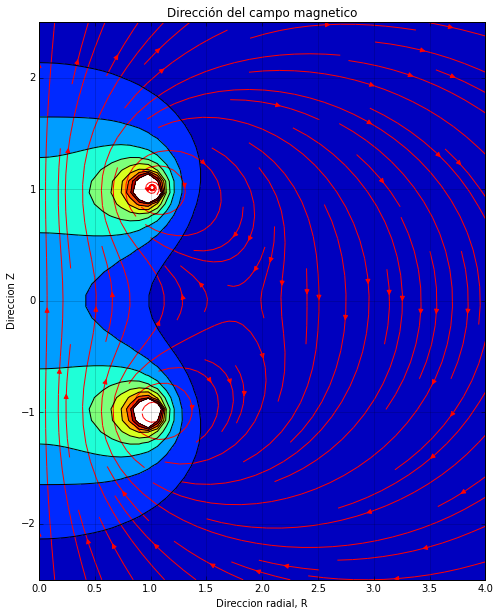

In [60]:
qm, I, a, h = 1., [1., 1.], [1., 1.], [1., -1.]
ARGS = ([qm, I, a, h],)

I, a, h = ARGS[0][1], ARGS[0][2], ARGS[0][3]
N_malla = 50
n, m = 4., 2.5
R_min, R_max, Z_min, Z_max = 0.001, n, -m, m

r, z = linspace(R_min, R_max, N_malla), linspace(Z_min, Z_max, N_malla)
R, Z = meshgrid(r,z)

b_r, b_z, B = campo_unit2(I, a, h, [R,Z])

figure(figsize=(8,12), dpi=80)
contour_levels = arange(0., 20., 2.)
cs = contourf(R, Z, B, contour_levels , corner_mask=True)
contour(cs, colors='k')
grid(c='k', ls='-', alpha=0.3)
streamplot(R, Z, b_r, b_z, color='r')

plt.gca().set_aspect('equal', adjustable='box')
xlabel('Direccion radial, R') 
ylabel('Direccion Z')
axis([0., R_max, Z_min, Z_max])
title(u'Dirección del campo magnetico')
show()

## Dinámica de una partícula cargada en un campo magético, confinamiento de la partícula

Aquí ponemos la ecuación del movimiento de la partícula en el campo magnético:

La fuerza de Lorentz es la fuerza que se ejerce sobre una carga, su ecuación es:

$$\vec{F} = q(\vec{E} + \vec{v} \times \vec{B})$$

En este caso suponemos que no existe ningún campo eléctrico, por lo que la ecuación anterior resulta:

$$\vec{\dot{v}} = \frac{q}{m}\vec{v} \times \vec{B} = q_{m} \vec{v} \times \vec{B}$$

In [61]:
#Se define la ecuacion diferencial para resolver la dinamica de una particula
def carga_en_campo_xyz(entrada, t, ARGS=[1., [1.], [1.], [1.]]):
    #cómo se llaman las entradas, primero introducimos la posición y luego la velocidad
    x,y,z,vx,vy,vz = entrada[0],entrada[1],entrada[2],entrada[3],entrada[4],entrada[5]
    r = sqrt((x**2) + (y**2))
    
    #Se determinan los parametros necesarios para calcular el campo magnetico
    #un parametro adicional aparece, qm el cociente carga entre masa de la particula
    qm, I, a, h = ARGS[0], ARGS[1], ARGS[2], ARGS[3]
    
    #Se determina el valor de la bandera
    if r==0: f=1
    else: f=0
    
    B_r, Bz = campo(I, a, h, array([r, z]), f)
    Bx = B_r*cos(arctan2(y, x))
    By = B_r*sin(arctan2(y, x))

    #el producto punto entre la fuerza y el campo magnético
    vx_dot = (vy*Bz) - (vz*By)
    vy_dot = (vz*Bx) - (vx*Bz)
    vz_dot = (vx*By) - (vy*Bx)
    
    #la ecuación nos regresa velocidad inicial en x, y, z en ese orden y
    #fuerza en x, y, z
    return [vx,vy,vz, qm*vx_dot, qm*vy_dot, qm*vz_dot]

Se define a continuación la función que se encarga de realizar la simulación de la dinámica de la partícula en el campo magnético.

In [105]:
def dinamica(inicio, t_max, MallaT, ARGS=[1., [1.], [1.], [1.]], flag=0, flag2=[1,1], contorno=[0.,20.,2.]):
    #ARGS tiene el siguiente formato [qm, I, a, h]
    #inicio es la condicion inicial de la particula
    
    #Se calcula el movimiento de la particula en el campo magnetico determinado por los parametros ARGS
    tiempo = linspace(0, t_max, MallaT)
    movimiento = odeint(carga_en_campo_xyz, inicio, tiempo, args = ARGS, rtol=1e-10, atol=1e-12, mxstep=int(1e6))

    #Se hacen 2 graficos, el primero es la proyeccion del movimiento en el plano XY
    # y el segundo el movimiento en el eje Z en funcion del tiempo
    x,y,z = movimiento[:, 0], movimiento[:, 1], movimiento[:, 2]        
    
    #Se definen los parametros del arreglo de espiras
    I, a, h = ARGS[0][1], ARGS[0][2], ARGS[0][3]
    if flag2[0]==1:
        f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

        #Se calcula la direccion del campo magnetico
        N_malla = 50
        n, m = 2.5*amax(a), 2.5*amax(h)
        R_min, R_max, Z_min, Z_max = 0.05, n, -m, m
        r1, z1 = linspace(R_min, R_max, N_malla), linspace(Z_min, Z_max, N_malla)
        R1, Z1 = meshgrid(r1, z1)
        b_r1, b_z1, B1 = campo_unit2(I, a, h, [R1,Z1])

        contour_levels = arange(contorno[0],contorno[1],contorno[2])
        cs1 = ax1.contourf(R1, Z1, B1, contour_levels , corner_mask=True)
        ax1.contour(cs1, colors='k')
        ax1.streamplot(R1, Z1, b_r1, b_z1, color='r')
        
        ax1.set_aspect('equal', adjustable='box')
        ax1.set_xlabel ('Direccion radial, R') 
        ax1.set_ylabel ('Direccion Z')
        ax1.axis([0., R_max, Z_min, Z_max])
        ax1.set_title(u'Dirección del campo magnetico')

        ax2.plot(x, y)
        ax2.set_xlabel ('Direccion X') 
        ax2.set_ylabel ('Direccion Y')
        ax2.set_title("Trayectoria en el plano XY")
        ax2.set_aspect('equal', adjustable='box')
    
        ax3.plot(tiempo, z)
        ax3.set_xlabel ('Tiempo') 
        ax3.set_ylabel ('Direccion Z')
        ax3.set_title("Z en funcion del tiempo")
        
        #Se dibujan como referencia el lugar donde se encuentran las espiras 
        angle = np.linspace(0, 2 * pi, 100)
        for i in range(len(a)):
            Xi, Yi, Zi = a[i]*cos(angle), a[i]*sin(angle), h[i]
            ax2.plot(Xi, Yi, color='r')
            ax3.axhline(y=Zi, c='r')

    if flag2[1]==1:
        #Tambien se grafica la dinamica de la particula en el espacio 3D
        fig = figure(figsize=(10,10))
        ax = fig.gca(projection='3d')

        ax.plot(x, y, z, label='Trayectoria de la carga')
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')
        ax.set_aspect('equal', adjustable='box')
    
        #Se dibujan como referencia el lugar donde se encuentran las espiras
        angle = np.linspace(0, 2 * pi, 100)
        for i in range(len(a)):
            Xi, Yi, Zi = a[i]*cos(angle), a[i]*sin(angle), h[i]
            plot(Xi, Yi, Zi, 'r')
        ax.view_init(15, 15)
        show()
    
    if flag == 1:
        return movimiento

Realizamos la simulación de una partícula que viene viajando en el punto $\vec r = (0,0,0.25)$, y velocidad $\vec v = (0.9,0,0)$. A continuación se muestra el movimiento en el plano $XY$, el movimiento en el eje Z en función del tiempo , así como su movimiento en 3D:

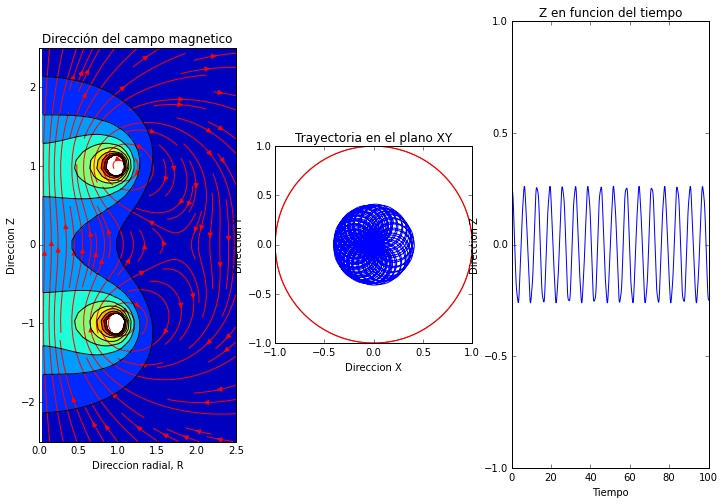

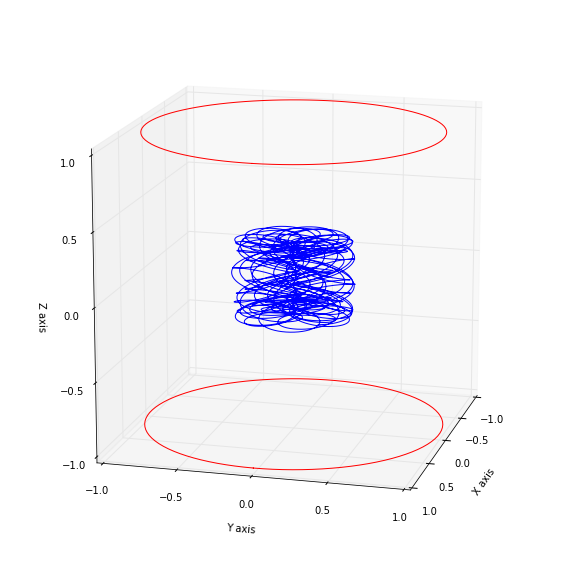

In [89]:
a, h, I, qm = [1., 1.], [1., -1.], [1., 1.], 1.
ARGS = ([qm, I, a, h],)
T = 100.
dinamica([0., 0., 0.25, 0.9, 0., 0.], T, 200*T, ARGS, 0, [1, 1])

Realizamos la simulación de una partícula que viene viajando en el punto $\vec r = (0,0,0)$, y velocidad $\vec v = (0.1,0,0.5)$. A continuación se muestra el movimiento en el plano $XY$, el movimiento en el eje Z en función del tiempo , así como su movimiento en 3D:

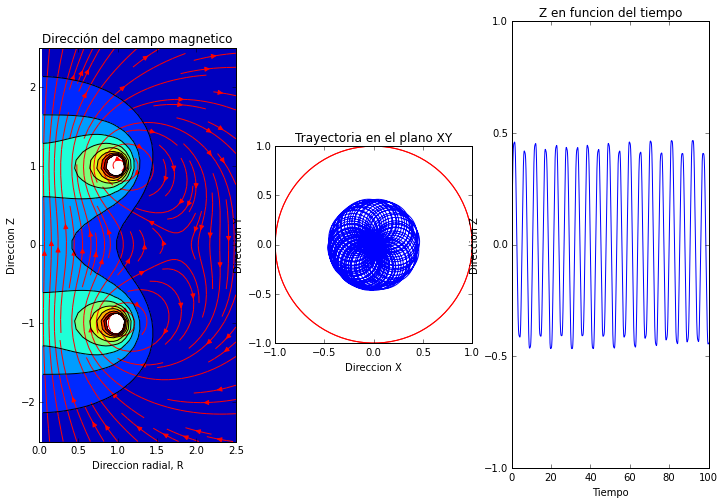

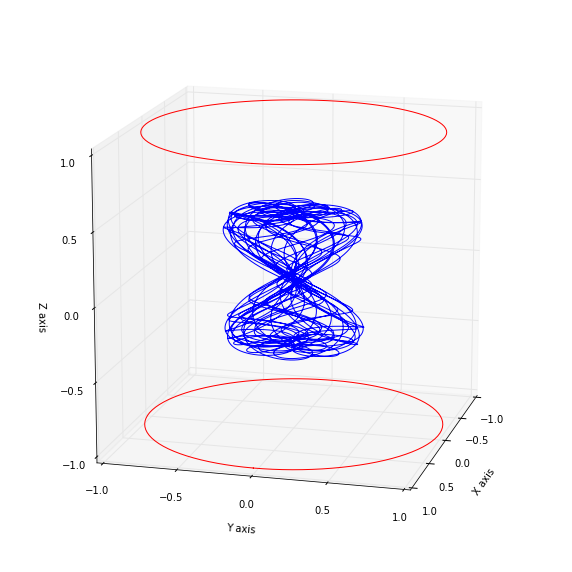

In [99]:
a, h, I, qm = [1., 1.], [1., -1.], [1., 1.], 1.
ARGS = ([qm, I, a, h],)
T = 100.
dinamica([0., 0., 0., 1., 0., 0.6], T, 1000*T, ARGS, 0, [1, 1])

Realizamos la simulación de una partícula que viene viajando en el punto $\vec r = (0,0.8,0)$, y velocidad $\vec v = (0,0,0.015)$. A continuación se muestra el movimiento en el plano $XY$, el movimiento en el eje Z en función del tiempo , así como su movimiento en 3D:

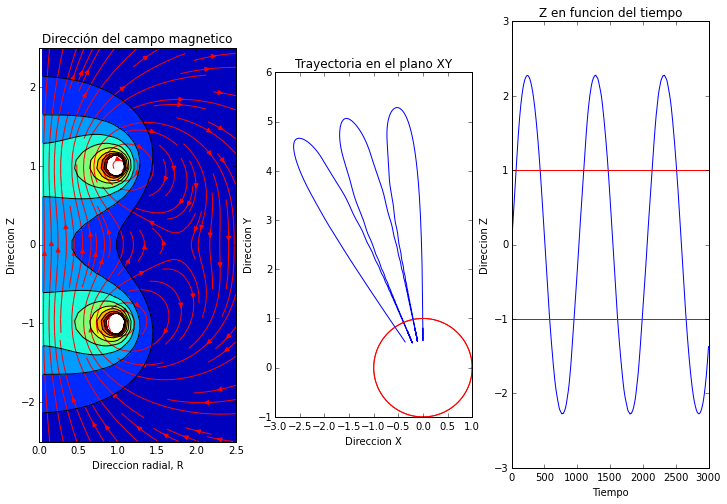

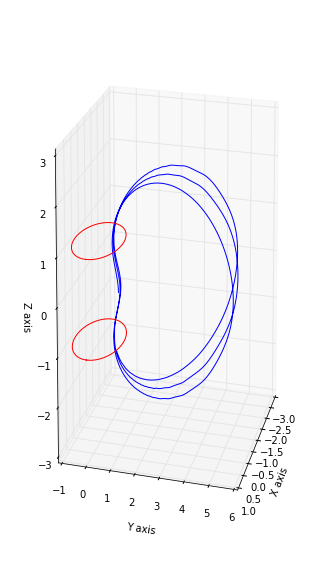

In [78]:
a, h, I, qm = [1., 1.], [1., -1.], [1., 1.], 1.
ARGS = ([qm, I, a, h],)
T = 3000.
dinamica([0., 0.8, 0., 0., 0., 0.015], T, 1000*T, ARGS, 0, [1, 1])

## Confinamiento con un arreglo más complejo

Realizamos la simulación de una partícula que viene viajando en el punto $\vec r = (0,0.2,0)$, y velocidad $\vec v = (0,0,9)$. A continuación se muestra el movimiento en el plano $XY$, el movimiento en el eje Z en función del tiempo , así como su movimiento en 3D:

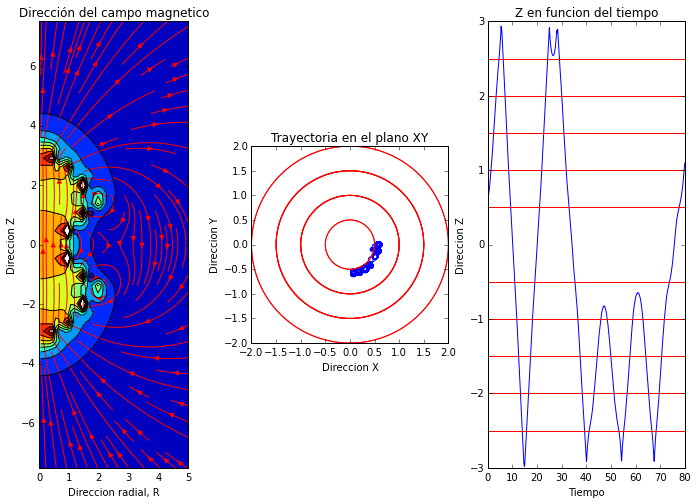

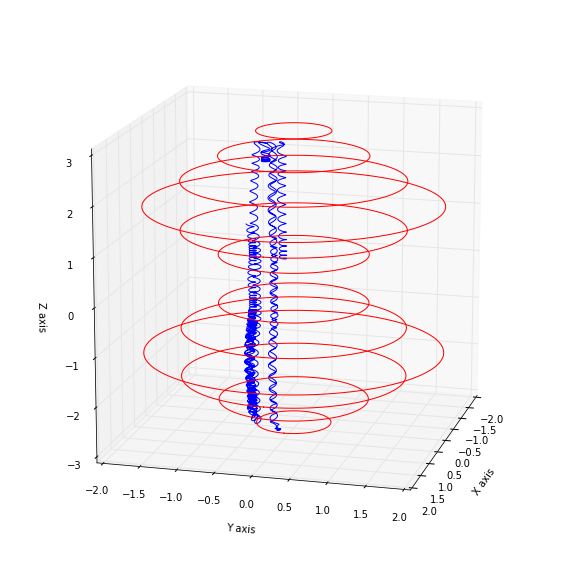

In [124]:
a = [0.5, 1., 1.5, 2., 1.5, 1., 1., 1.5, 2., 1.5, 1., 0.5]
h = [-3., -2.5, -2., -1.5, -1., -0.5, 0.5, 1., 1.5, 2., 2.5, 3.]
I = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]
qm = 1.

ARGS = ([qm, I, a, h],)
T = 80.
dinamica([0.5, 0., 0.6, 0., 1., 0.2], T, 3000*T, ARGS, 0, [1, 1], [0., 30., 3.])

## Extensión de la bobina de Helmholtz en cada dirección

Que pasa si ahora colocamos el arreglo de la bobina de Helmhotlzno sobre cada uno de los ejes del espacio. Es decir colocar un arreglo de la siguiente forma:

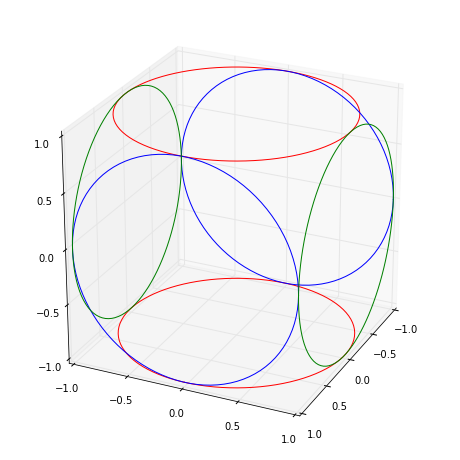

In [98]:
fig = figure(figsize=(10,8))
ax = fig.gca(projection='3d')
angle = np.linspace(0, 2 * pi, 100)
a, h = 1., 1.

X1, Y1, Z1 = a*cos(angle), a*sin(angle), h*ones(len(angle))
X2, Y2, Z2 = a*cos(angle), a*sin(angle), -h*ones(len(angle))
X3, Y3, Z3 = h*ones(len(angle)), a*cos(angle), a*sin(angle)
X4, Y4, Z4 = -h*ones(len(angle)), a*cos(angle), a*sin(angle)
X5, Y5, Z5 = a*cos(angle), h*ones(len(angle)), a*sin(angle)
X6, Y6, Z6 = a*cos(angle), -h*ones(len(angle)), a*sin(angle)

plot(X1, Y1, Z1, 'r')
plot(X2, Y2, Z2, 'r')
plot(X3, Y3, Z3, 'b')
plot(X4, Y4, Z4, 'b')
plot(X5, Y5, Z5, 'g')
plot(X6, Y6, Z6, 'g')

ax.set_aspect('equal', adjustable='box')
ax.view_init(25, 25)
show()

Notemos que calcular el campo magnético generado por un arreglo tridimensional de espiras se puede reducir a aplicar una rotación al campo magnético generado por una espira identica pero sobre el Z, lo único con que hay que tener cuidado es con el sentido de la corriente.